# Psyschometrics for Rapid Emotion Comprehension

### Description
In this tutorial we will be going through the _data science pipeline_. The steps in the data science pipeline are the main stages you will go through when conduting a data science project. 
The stages are:
1. Data Collection
2. Data Management 
3. Exploratory Data Analysis
4. Hypothesis Testing
5. Communication of Results

Although the stages a presented sequentially, as we will see, we only loosely follow the sequence. We often go back and forth between them. In this tutorial we will go through the data science pipeline to try to answer the following question:

_What psychological factors predict emotional intelligence?_


### Background

Because this investigation will rely on some terms from psychology, the following will serve as a reference of potentially unfamiliar concepts.
- _Emotional Intelligence_ (EI): The ability to 1) "recognize, understand, and manage our own emotions" and 2) "recognize, understand and influence the emotions of others."<sup> (1) </sup>
- _Neuroticism_: One of the Big 5 personality traits associated with one's "tendency to experience negative emotions and psychological distress in response to stressors." <sup> (2) </sup> Greater neuroticism means more distress.
- _Extraversion_: One of the Big 5 personality traits associated with one's degree of sociability, positive emotionality, and general activity." <sup> (2) </sup> Greater extraversion means more sociability, positive emotionality, and activity.
- _Openness_:  One of the Big 5 personality traits associated with one's "levels of curiosity, independent judgment, and conservativeness." <sup> (2) </sup> Greater openness means more curiosity, independent judgements, and less conservativeness.
- Agreeablness: One of the Big 5 personality traits associated with one's "altruistic, sympathetic, and cooperative tendencies" <sup> (2) </sup>. Greater agreeablness means greater altruism, sympathy, and cooperative tendencies.
- _Conscientiousness_: One of the Big 5 personality traits associated with one’s "level of self-control in planning and organization." <sup> (2) </sup> Greater Conscientiousness means more self-control and organization.
- Raven's IQ: A score associated with the Raven's Matrices test that measures "an individual’s intelligence and abstract reasoning." <sup> (3) </sup> Higher scores mean higher intelligence.

### Data Collection
The first step of any data science project is, naturally, to collect the data. There are many ways to collect data. In the scientific literature you will often see researchers run experiments to collect data by probing the universe or human subjects. In computer science we often collect data by scraping it from the web, synthetically generating it, or by accessing an open source database with already curated data. For our purposes we will use data from an open source database called OpenNeuro (see https://openneuro.org/). OpenNeuro contains lots of datasets on neural data collected using techniques like MRI, PET, and EEG scans. Specifically, we will be using data from the Amsterdam Open MRI Collection (AOMIC) descibed in detail here: https://www.nature.com/articles/s41597-021-00870-6)



#### Description of Our Data
The AOMIC has a lot of data. We only need a small subset of it. We will completely ignore the MRI data and only use the psychological level data because neural computation is beyond the scope of this introductory tutorial. Below is a description of the psychological level data we will be using. 

We are restricting ourselves to the Population Imaging of Psychology 1 (PIOP1) dataset which contained a total of 216 subjects. <sup> (4) </sup>  All the subjects are university students.

We will be using participants' demographic and psychological assessment data which includes their age, sex, BMI, handedness, pure or applied area of studies, religiosity, raven's IQ score, and their score on each of the Big 5 Personality traits. 

We will also be using data from the _emotion matching task_.
 
#### Emotion Matching Task
The emotion matching task is how we will operationally measure emotional intelligence. Below is a description, from the studies' paper, of the emotion matching task.

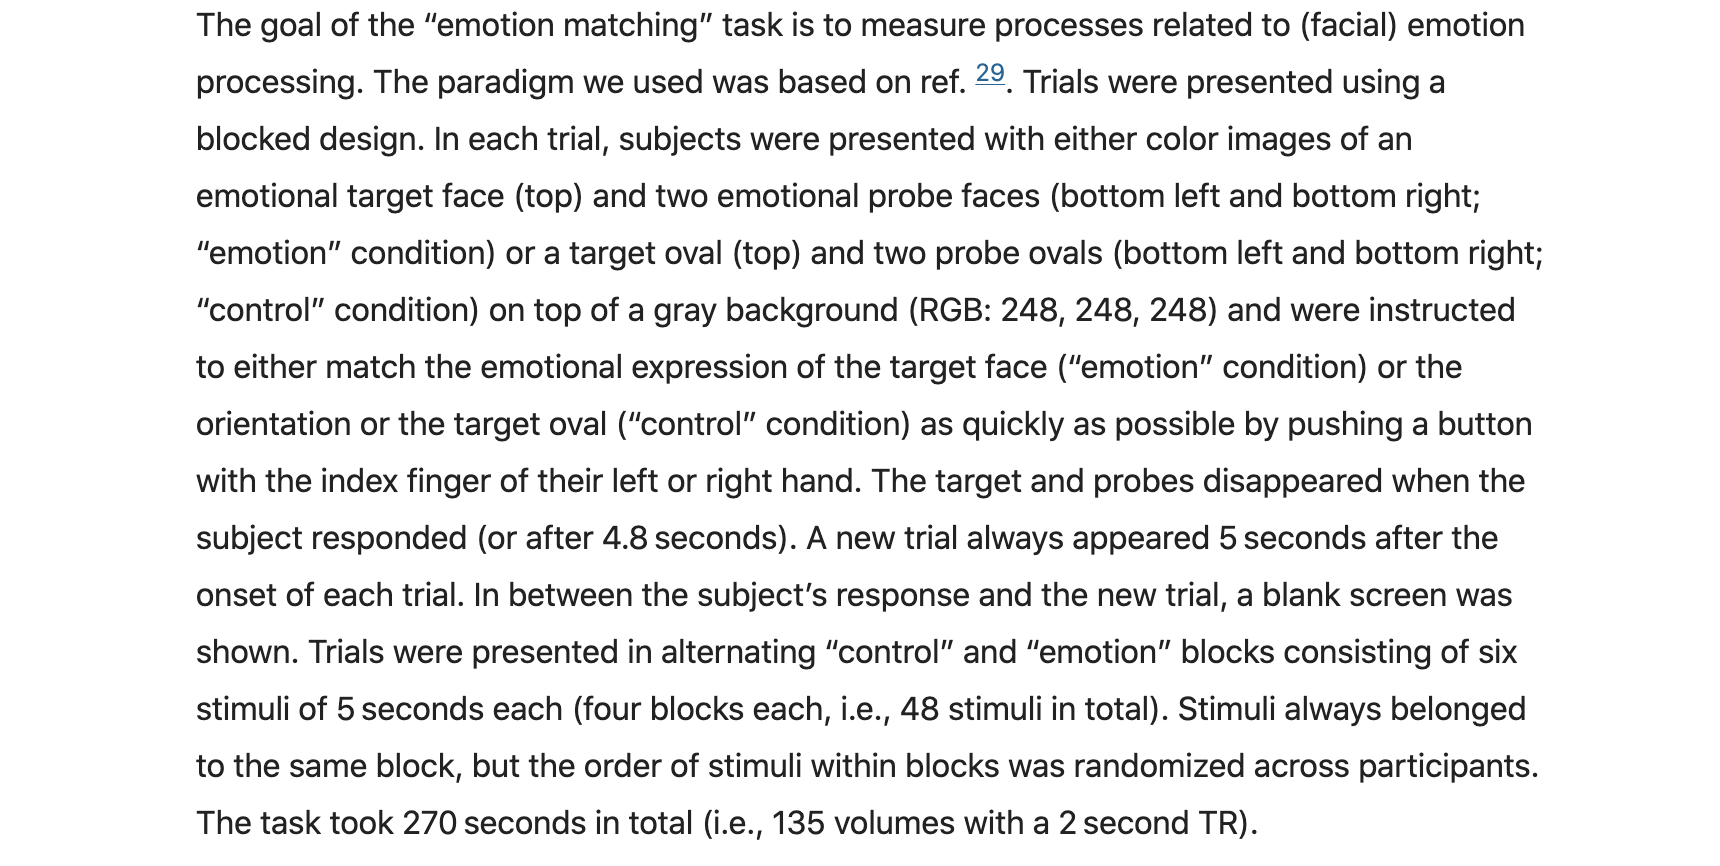


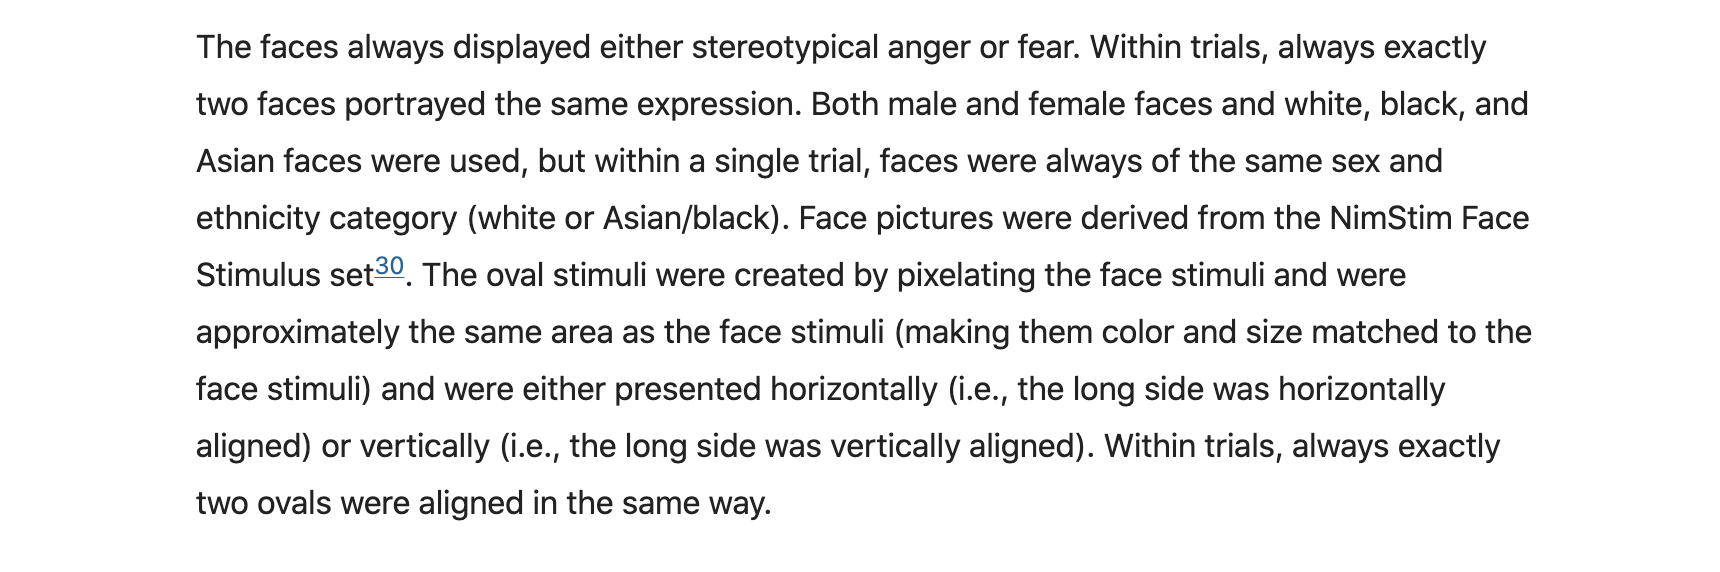

Because the emotion matching task consists of trying to quickly correctly match emotion expressions it can serve as a way to measure emotional recognition (one aspect of EI). We can operationalize the concept of emotional comprehension as a proxy for EI in two ways. One is through calculating the proprotion of correctly classified emotions in the task. The other is to calculate the relative rapidity at which a subject correctly matched emotions. These will be our primary metrics for emotional comprehension in this tutorial.

#### Reading in the Data

The following code will get the relevant AOMIC-PIOP1 data from OpenNeuro.

In [137]:
# It is common practice to shorten 'pandas' to 'pd' for 
# less typing when calling functions from the pandas library.
import pandas as pd
import numpy as np

# In this part, we read in the data. The data is in several different files
# which we would like to eventually combine into one dataframe. 
df_participants = pd.read_csv("https://openneuro.org/crn/datasets/ds002785/snapshots/2.0.0/files/participants.tsv",sep='\t')

df_subjects = pd.DataFrame()
# Iterates through subject numbers. Each subject has a dataframe
# of all the trials they participated in. This loop
# combines all those dataframes into one.
for i in range(1, len(df_participants)+1):
    df_subject = pd.read_csv("https://openneuro.org/crn/datasets/ds002785/snapshots/2.0.0/files/sub-"+ 
                             str(i).zfill(4) +":func:sub-"+ str(i).zfill(4) +"_task-emomatching_acq-seq_events.tsv",sep='\t')
   
    # Some participants in the PIOP1 data set never did the emotion matching task 
    # so there is no csv at the link above. In this case the length of the dataframe 
    # is 0 so we do not add it to our aggregate trial data frame. 
    if (len(df_subject) != 0):
        
        # Appends a column to the specific subject's data frame indicating what subject number they 
        # are. This will be useful when all the subjects' data are put together in one
        # dataframe so we can keep track of what data is associated to a given subject.
        df_subject['subject'] = [i]*len(df_subject) 
        
        # Concatenates the new subject's trial dataframe to the aggregate dataframe
        df_subjects = pd.concat([df_subjects, df_subject])

# Concatenation preserves original indices so we reset them to 
# be seequential.
df_subjects = df_subjects.reset_index()
df_subjects



,index,onset,duration,trial_type,response_time,response_hand,response_accuracy,ori_match,sex,ethn_target,ethn_match,ethn_distractor,emo_match,subject
0,0,10.0115,1.9212,control,1.9212,right,correct,vertical,NaN,NaN,NaN,NaN,NaN,1
1,1,15.0197,1.3478,control,1.3478,left,correct,vertical,NaN,NaN,NaN,NaN,NaN,1
2,2,20.0279,1.2605,control,1.2605,right,correct,horizontal,NaN,NaN,NaN,NaN,NaN,1
3,3,25.0362,0.9700,control,0.9700,left,correct,horizontal,NaN,NaN,NaN,NaN,NaN,1
4,4,30.0444,0.8287,control,0.8287,right,correct,horizontal,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10027,43,225.3638,4.9000,emotion,NaN,NaN,miss,NaN,female,black,asian,asian,fear,215
10028,44,230.3720,2.6348,emotion,2.6348,right,correct,NaN,male,caucasian,caucasian,caucasian,anger,215
10029,45,235.3802,4.9000,emotion,NaN,NaN,miss,NaN,male,black,black,black,fear,215
10030,46,240.3884,4.9000,emotion,NaN,NaN,miss,NaN,female,caucasian,caucasian,caucasian,anger,215


This is a lot of code so let's break it down. If the code takes a little bit of time to run that is ok, concatenating many dataframe can be computationally intensive.

We want to read in the tsv file containing data about our participants and also the tsv files containing data about the emotion matching task trials for each subject. Instead of manually downloading each file by hand we can inspect the html of the download buttons on OpenNeuro to get the actual tsv link. Here is what the process looks like for finding the participants tsv file link.

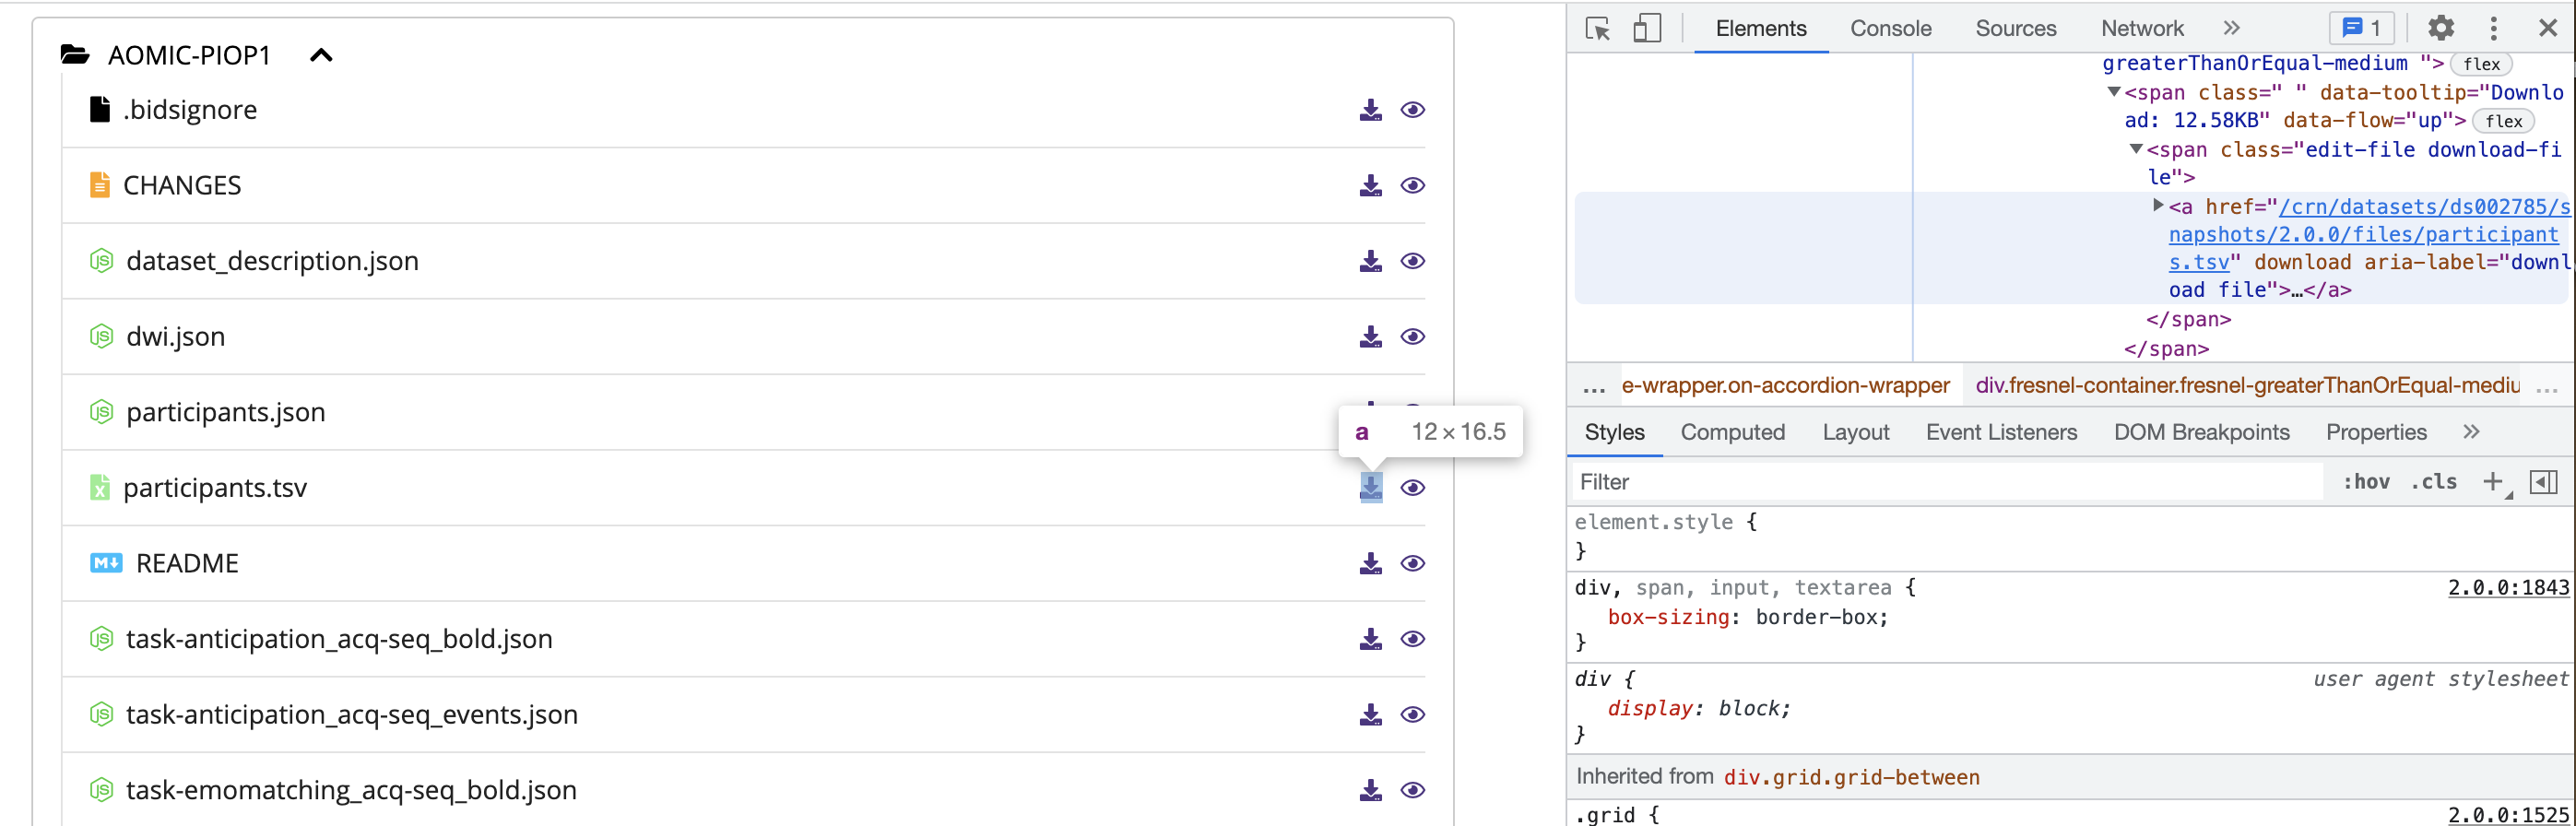

Once we have the link we can use pandas read_csv function to convert the tsv file into a pandas dataframe. We chose to store our data in a dataframe because a dataframe is a useful representation of tabular data (the sort we have). A dataframe would not have been a good choice if we wanted to store graph data like for a social network. 

It was simple to read in the participants tsv file since there was only one file with all the data. Reading in the emotion matching task trial data for each subject required more work because there was a different file for each subject. To accomplish it we exploited the fact that there was a regularity in the tsv links for each subject's emotion matching tsv file. All the links followed the format but with different subject number so we simply iterated through the subject numbers and concatenated the trial data to an aggregate dataframe. We did not want to lose track of which trials were done by which subject so, before concatenating a subject's data to the aggregate dataframe, we marked all of the subject's trials with the subjects number. 

#### Additional Notes
For our data reading purposes we only needed the pandas library. Other common libraries used for data collection are BeautifulSoup and requests. You can use requests to access an API and both of them if your data comes from webscraping. 

- See here for documentation about the requests library: https://docs.python-requests.org/en/latest/
- See here for documentation about the BeautifulSoup: https://beautiful-soup-4.readthedocs.io/en/latest/

Although we will not cover webscraping in this tutorial, if it is something you need for your project, I recommend this concise introduction: https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/

### Data Management 

In [91]:
df_subjs = df_participants
for i in range(0, len(df_participants)):
    if len(df_subjects[df_subjects['subject']==i+1]) == 0:
        df_subjs = df_subjs.drop(i, axis='index')
        
df_subjs

,participant_id,age,sex,BMI,handedness,education_category,religious_now,raven_score,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C
0,sub-0001,26.25,F,24.0,right,applied,no,29.0,35,44,37,39,48
1,sub-0002,21.00,F,23.0,right,academic,no,27.0,27,53,40,48,34
2,sub-0003,23.00,M,22.0,right,academic,no,22.0,35,40,43,37,38
3,sub-0004,23.50,F,22.0,right,applied,no,21.0,29,47,41,48,41
4,sub-0005,21.75,M,19.0,ambidextrous,applied,no,28.0,26,35,40,38,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,sub-0211,22.50,M,20.0,right,academic,no,35.0,34,40,52,41,49
211,sub-0212,20.50,F,29.0,ambidextrous,applied,no,19.0,24,44,29,47,41
212,sub-0213,19.75,M,26.0,right,applied,no,18.0,20,50,40,46,39
213,sub-0214,19.50,M,19.0,right,applied,no,19.0,24,50,37,46,56


In [116]:
# Repeat values 48 times since 48 trials
subj_merge = pd.DataFrame(np.repeat(df_subjs.values, 48, axis=0))
# Sets columns with proper names
subj_merge.columns = df_subjs.columns
# Repeat function converts all data types to pandas object type
# so we have to manually convert the numeric types back to numeric
subj_merge['raven_score'] = pd.to_numeric(subj_merge['raven_score'])
subj_merge['NEO_N'] = pd.to_numeric(subj_merge['NEO_N'])
subj_merge['NEO_E'] = pd.to_numeric(subj_merge['NEO_E'])
subj_merge['NEO_O'] = pd.to_numeric(subj_merge['NEO_O'])
subj_merge['NEO_A'] = pd.to_numeric(subj_merge['NEO_A'])
subj_merge['NEO_C'] = pd.to_numeric(subj_merge['NEO_C'])
subj_merge

,participant_id,age,sex,BMI,handedness,education_category,religious_now,raven_score,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C
0,sub-0001,26.25,F,24.0,right,applied,no,29.0,35,44,37,39,48
1,sub-0001,26.25,F,24.0,right,applied,no,29.0,35,44,37,39,48
2,sub-0001,26.25,F,24.0,right,applied,no,29.0,35,44,37,39,48
3,sub-0001,26.25,F,24.0,right,applied,no,29.0,35,44,37,39,48
4,sub-0001,26.25,F,24.0,right,applied,no,29.0,35,44,37,39,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10027,sub-0215,18.25,F,20.0,right,applied,yes,24.0,33,42,42,41,48
10028,sub-0215,18.25,F,20.0,right,applied,yes,24.0,33,42,42,41,48
10029,sub-0215,18.25,F,20.0,right,applied,yes,24.0,33,42,42,41,48
10030,sub-0215,18.25,F,20.0,right,applied,yes,24.0,33,42,42,41,48


In [117]:
df = df_subjects.join(subj_merge, how='inner', lsuffix='_caller', rsuffix='_other')
df.columns
df

,index,onset,duration,trial_type,response_time,response_hand,response_accuracy,ori_match,sex_caller,ethn_target,...,BMI,handedness,education_category,religious_now,raven_score,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C
0,0,10.0115,1.9212,control,1.9212,right,correct,vertical,NaN,NaN,...,24.0,right,applied,no,29.0,35,44,37,39,48
1,1,15.0197,1.3478,control,1.3478,left,correct,vertical,NaN,NaN,...,24.0,right,applied,no,29.0,35,44,37,39,48
2,2,20.0279,1.2605,control,1.2605,right,correct,horizontal,NaN,NaN,...,24.0,right,applied,no,29.0,35,44,37,39,48
3,3,25.0362,0.9700,control,0.9700,left,correct,horizontal,NaN,NaN,...,24.0,right,applied,no,29.0,35,44,37,39,48
4,4,30.0444,0.8287,control,0.8287,right,correct,horizontal,NaN,NaN,...,24.0,right,applied,no,29.0,35,44,37,39,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10027,43,225.3638,4.9000,emotion,NaN,NaN,miss,NaN,female,black,...,20.0,right,applied,yes,24.0,33,42,42,41,48
10028,44,230.3720,2.6348,emotion,2.6348,right,correct,NaN,male,caucasian,...,20.0,right,applied,yes,24.0,33,42,42,41,48
10029,45,235.3802,4.9000,emotion,NaN,NaN,miss,NaN,male,black,...,20.0,right,applied,yes,24.0,33,42,42,41,48
10030,46,240.3884,4.9000,emotion,NaN,NaN,miss,NaN,female,caucasian,...,20.0,right,applied,yes,24.0,33,42,42,41,48


Cleaning the data:

The documentation in OpenNeuro about the emotion matching task (see https://openneuro.org/datasets/ds002785/versions/2.0.0/file-display/task-emomatching_acq-seq_events.json) specifies what the possible values are for an entry in each column. For example the response hand is either 'right' or 'left'. We can also get this information from the AOMIC paper describing the experimental procedure (see https://www.nature.com/articles/s41597-021-00870-6). Although we would hope that the data we downloaded follows its documentation and the paper's description, it is good practice to check that this is the case. As you will see sometimes documentation is not correct! 

By reviewing the paper we see something strange. There is no mention of an ethn_distractor or ethn_match variable. The task was not about matching the correct ethnicity of a face so this makes sense. The picture below shows the 10 variables that we would expect to be included based upon the AOMIC paper published in nature.
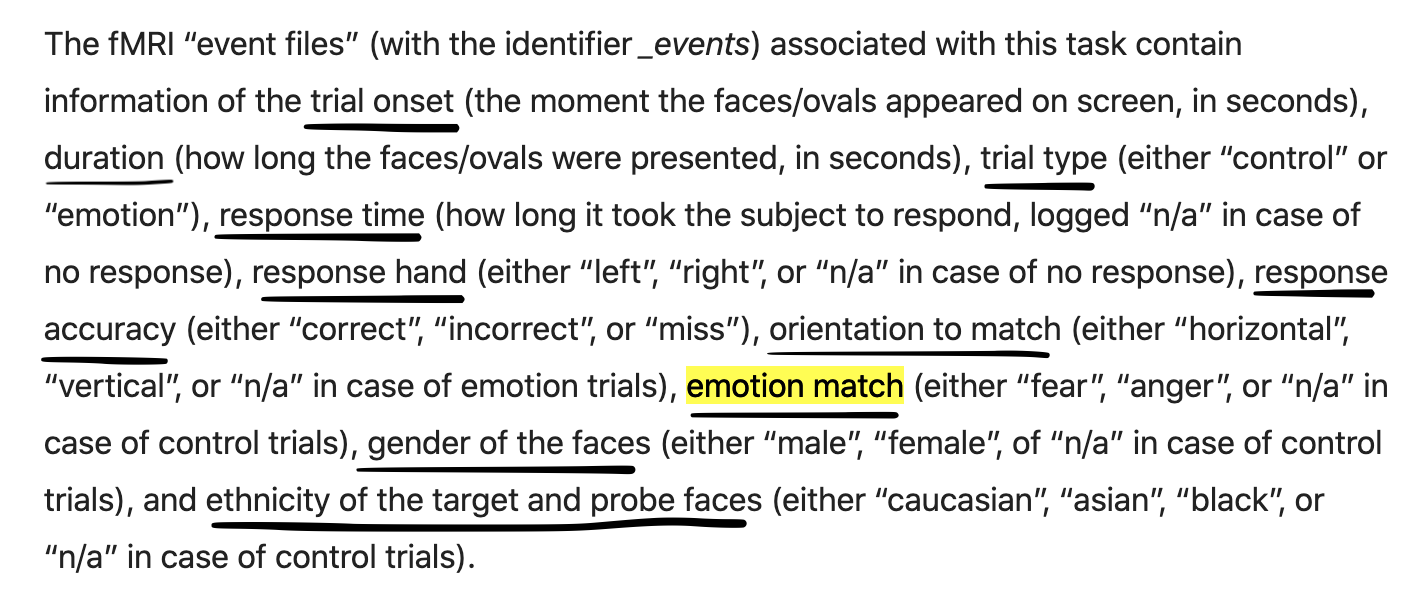


It is unclear where these variables came from, but because the AOMIC paper was peer reviewed for a highly selective journal (Nature), it makes sense to follow it over the documentation in OpenNeuro. We therefore remove the ethn_distractor and ethn_match columns. 

In [2]:
df_subjects = df_subjects.drop(['ethn_distractor', 'ethn_match'],axis = 1)
df_subjects

,index,onset,duration,trial_type,response_time,response_hand,response_accuracy,ori_match,sex,ethn_target,emo_match,subject
0,0,10.0115,1.9212,control,1.9212,right,correct,vertical,NaN,NaN,NaN,1
1,1,15.0197,1.3478,control,1.3478,left,correct,vertical,NaN,NaN,NaN,1
2,2,20.0279,1.2605,control,1.2605,right,correct,horizontal,NaN,NaN,NaN,1
3,3,25.0362,0.9700,control,0.9700,left,correct,horizontal,NaN,NaN,NaN,1
4,4,30.0444,0.8287,control,0.8287,right,correct,horizontal,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10027,43,225.3638,4.9000,emotion,NaN,NaN,miss,NaN,female,black,fear,215
10028,44,230.3720,2.6348,emotion,2.6348,right,correct,NaN,male,caucasian,anger,215
10029,45,235.3802,4.9000,emotion,NaN,NaN,miss,NaN,male,black,fear,215
10030,46,240.3884,4.9000,emotion,NaN,NaN,miss,NaN,female,caucasian,anger,215


Now that we have restricted the dataset to only those variables we expect to be in it, let us also make sure that the values in each column are the ones we would expect from the documentation and paper (which are consistent in this respect). To do this we iterate through the dataframe and check if each entry takes one of the values that the documentation says it will. For example we would want every value in the 'sex' column to be either 'male' or 'female'. If an entry is unanticipated then the loop stops and the column and row at which the unanticipated value exists is printed. If all entries are valid then the message "All valid values" will be printed.

In [3]:
# For each row checks that the data in each column takes the anticipated possible values.
# If not the index at with the unanticipated data is printed and the loop stops.
for index, row in df_subjects.iterrows():
    # onset should either be NaN or a float
    if (not (pd.isna(row['onset']) or isinstance(row['onset'], float))):
        print('onset')
        print(i)
        break
    # duration should either be NaN or a float
    if (not (pd.isna(row['duration']) or isinstance(row['duration'], float))):
        print('duration')
        print(i)
        break
    # trial_type should either be NaN, control, or emotion
    if (not (pd.isna(row['trial_type']) or (row['trial_type'] == 'control') or (row['trial_type'] == 'emotion'))):
        print('trial_type')
        print(i)
        break
    # response_time should either be NaN or a float
    if (not (pd.isna(row['response_time']) or isinstance(row['response_time'], float))):
        print('response_time')
        print(i)
        break
    # response_hand should either be NaN, control, or emotion
    if (not (pd.isna(row['response_hand']) or (row['response_hand'] == 'right') or (row['response_hand'] == 'left'))):
        print('response_hand')
        print(index)
        break
    # response_accuracy should either be NaN, correct, miss, or incorrect
    if (not (pd.isna(row['response_accuracy']) or (row['response_accuracy'] == 'correct') or (row['response_accuracy'] == 'miss') or (row['response_accuracy'] == 'incorrect'))):
        print('response_accuracy')
        print(index)
        break
    # ori_match should either be NaN, vertical, or horizontal 
    if (not (pd.isna(row['ori_match']) or (row['ori_match'] == 'vertical') or (row['ori_match'] == 'horizontal'))):
        print('ori_match')
        print(index) 
        break
    # sex should either be NaN, male, or female
    if (not (pd.isna(row['sex']) or (row['sex'] == 'male') or (row['sex'] == 'female'))):
        print('sex')
        break
    # ethn_target should either be NaN, caucasian, black, or asian
    if (not (pd.isna(row['ethn_target']) or (row['ethn_target'] == 'caucasian') or (row['ethn_target'] == 'black') or (row['ethn_target'] == 'asian'))):
        print('ethn_target')
        print(index)
        brea
    # emo_match should either be NaN, fear, or anger
    if (not (pd.isna(row['emo_match']) or (row['emo_match'] == 'fear') or (row['emo_match'] == 'anger'))):
        print('emo_match')
        print(index)
        break
print("All valid values")
    
    

All valid values


We see that all the entries take valid values.

Handling missing data:

Now that we know all our data is valid, we must consider how we deal with the missing values. Before handling missing data we must asking ourselves "why is the data missing?" Different answers to this question will give us different ways to handle the missing data. 

We can see in the first few rows of the table that the columns called sex, ethn_target, ethn_match, and emo_match all have missing values at the same time. After thinking about why this might be, we can realize that this is not by chance. Those variables are only relevant when the trial showed a face to match. In control trials, that show a shape, there would not be a sex, ethnicity, or emotion of what was displayed. When we read in the datafiles, the function read_csv interpreted such cases as missing data by coding them as NaN. We know this is not exactly accurate. The data is not missing, it is that there is no sex, ethnicity, or emotional expression of a shape in the control trials. Instead of being missing, they are not applicable.

We could account for this by recoding such cases as taking value None. None is a value that is often used to represent the fact that a variable is not applicable. None is, however, harder to work with. NaN is better integrated into the plotting libraries, so if we can avoid recoding variables as None that is desirable. We can keep the not applicable values as NaN if we can figure out which values are not applicable vs. truly missing. Once we know which NaNs are which, we can keep the not applicable ones as NaN and impute/handle the truly missing values when possible.


To check which NaNs are not applicable vs. truly missing we will iterate through the dataframe. We expect not applicable NaNs exactly in the following cases:
1)  sex, ethn_target, ethn_match, and emo_match are not applicable NaN if trial_type = 'control' because shapes in the control trial do not have a sex, ethnicity, or emotion.
2) ori_match is not applicable NaN if trial_type = 'emotion' because the faces in the emotion trial are not displayed at different angles.
3) response_time and response_hand are not applicable NaN if response_accuracy = 'miss' because if a response was missed they did not respond on time and there was no hand with which they responded.

If there are NaN values that are not explained by these cases, they truly represent missing values. Therefore we will check and account for the following for each row:
1) if sex, ethn_target, ethn_match, or emo_match are NaN when trial_type == 'emotion' then print 'truly missing'
2) if ori_match is NaN when trial_type == 'control' then print 'truly missing'
3) if response_time or response_hand are NaN when response_accuracy is not 'miss' then print 'truly missing'


In [4]:
# Checks to see if any data is truly missing. 
# Prints "Truly missing" is such data exists.
# If all NaN values are a result of being
# not applicable cases then "All NaNs are not 
# applicable" is printed.

truly_missing_exists = False

for index, row in df_subjects.iterrows():
    if ((pd.isnull(df_subjects.at[index, 'sex']) | pd.isnull(df_subjects.at[index, 'ethn_target']) | 
        pd.isnull(df_subjects.at[index, 'emo_match'])) & (df_subjects.at[index, 'trial_type'] == 'emotion')):
        print("Truly missing") 
        truly_missing_exists = True
    if (pd.isnull(df_subjects.at[index, 'ori_match']) & (df_subjects.at[index, 'trial_type'] == 'control')):
        print("Truly missing")
        truly_missing_exists = True
    if ((pd.isnull(df_subjects.at[index, 'response_time']) | pd.isnull(df_subjects.at[index, 'response_hand'])) 
        & (df_subjects.at[index, 'response_accuracy'] != 'miss')):
        print("Truly missing")
        truly_missing_exists = True

if (not truly_missing_exists):
    print("All NaNs are not applicable") 

All NaNs are not applicable


We see that all the NaNs in our dataframe are a result of not applicable variables. No data is truly missing. Thus we do not need to perform any techniques like imputation on any of the NaNs. We simply leave them in the table because they represent when a data value was not applicable to the given trial entry. 

It is not usually the case in data science that we do not have any missing data. So, it will be worthwhile to spend some time talking about what missing data would have looked like, the different kinds of missing data, and what we would have done had there been certain types of missing data. 

On handling missing data:




Exploratory data analysis:

Now that our data has been cleaned and prepared for analysis we will plot various variables against each other to see if we can find any relationships that appear to jump out at us. As a reminder, here are what our two dataframes look like. 

Motivating question: Is there a difference in the response time or response accuracy of subjects when the respond to the control or emotion trials? We plot a histogram of the response times to get a sense of the distribution of times for each trial type. 

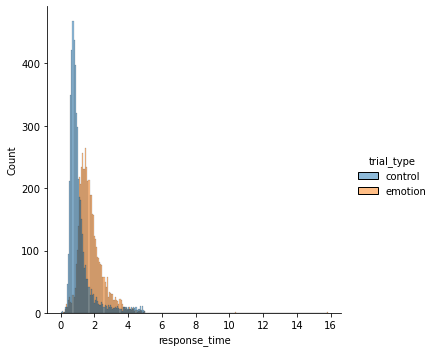

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creates histogram
sns.displot(df, x="response_time", hue = 'trial_type', bins = 250)

If we look very carefully there is a response time near 16 seconds. Lets take a closer look at the max response time to see its value.

In [119]:
df['response_time'].max()

15.839899999999972

The max response time is 15.8399 seconds. This does not make sense because according to the AOMIC paper published in nature the maximum duration for a trial is 5 seconds. The response time should be less than or equal to the length of a trial (duration) since, as described below, a subject must respond within 4.8 seconds for their response to not be considered a miss.
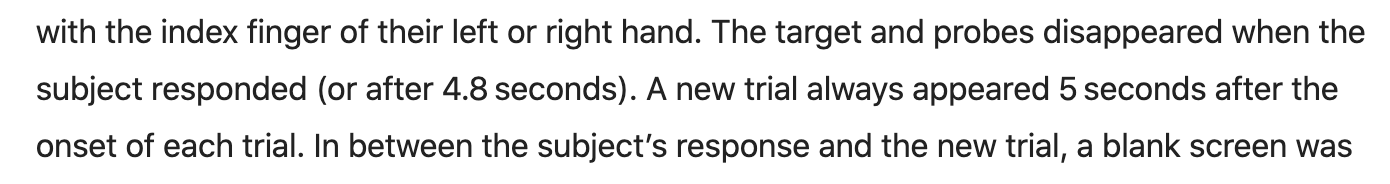

We must therefore go back to cleaning our data by getting rid of the data points with a duration longer than 4.8 seconds as they should not be there. Ideally we could know why this invalid data is present and perhaps account for it as one of the types of missing data. However, we do not know this information. Note that these values are not simply outliers. They are data values that should have been prohibited by the experimental deisgn so we will remove them from our dataset. There are very few invalid values like this so removing them will not effect our results much. 

In [126]:
df_clean = df[(df['duration'] <= 5)]

We now plot the distribution of response times for each trial type again. Notice how the range of values is now within the valid range.

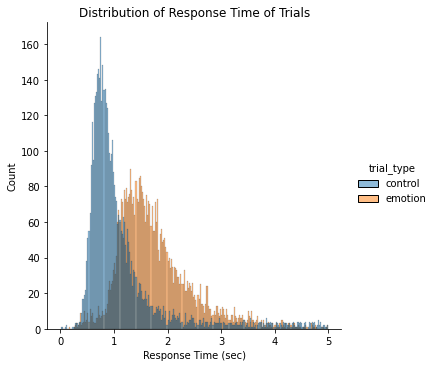

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

p = sns.displot(df_clean, x="response_time", hue = 'trial_type', bins = 250)
p.set(xlabel='Response Time (sec)', ylabel='Count', title = 'Distribution of Response Time of Trials')



Immediately we can see two things. First, it appears that people take longer, on average, to respond when they need to match a facial expression compared to when they need to match a shape. Second, it appears that there is greater variance in the response times of matching emotional facial expressions because the distribution is fatter around its center. We will calculuate the mean and standard deviation of each response time to check these intuitions.

In [128]:
# Prints control response time mean
print(df_clean[(df_clean['trial_type'] == 'control')]['response_time'].mean())
# Prints emotion trial response time mean
print(df_clean[(df_clean['trial_type'] == 'emotion')]['response_time'].mean())
# Prints control response time standard deviation
print(df_clean[(df_clean['trial_type'] == 'control')]['response_time'].std())
# Prints emotion trial response time standard deviation
print(df_clean[(df_clean['trial_type'] == 'emotion')]['response_time'].std())
            
                  
                  

1.1477172623883063
1.7673773759292761
0.7922243827764892
0.7105823073995964


Although the guess that the mean response time for the emotion trial was larger than that of the control trial, we see that the standard deviation is actually greater for the control trial. This might be accounted for by the fact that the control response time distribution is fairly right skewed so the values in the tail increase the standard deviation significantly. 

Given that people tend to respond slower to the emotion matching task, we would also expect that people will miss the emotion matching task more often than they do the control task. We will create a bar chart to compare the aggregate response accuracies for the different trial types. 

[Text(0.5, 0, 'Response Accuracy'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Response Accuracy Frequencies')]

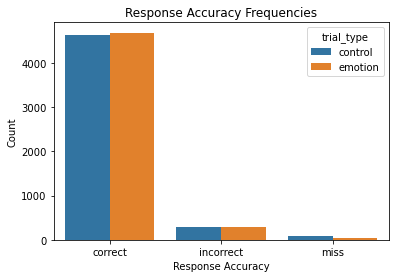

In [129]:
# Creates bar plot to count frequency of all response types
p = sns.countplot(x='response_accuracy', hue ="trial_type", data=df_clean)
p.set(xlabel='Response Accuracy', ylabel='Count', title = 'Response Accuracy Frequencies')

From this plot we see something surprising. The response accuracy for both the control and emotion trial are quite similar. However, people appear to miss the control trials more often, against the expectation! We can zoom in to see this more clearly.

[Text(0.5, 0, 'Response Accuracy'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Response Accuracy Frequencies')]

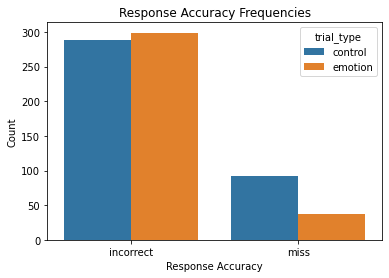

In [130]:
# Creates bar plot for incorrect and missed responses only
p = sns.countplot(x='response_accuracy', hue ="trial_type", 
                  data=df_clean[(df_clean['response_accuracy'] == "miss") | (df_clean['response_accuracy'] == "incorrect")])
p.set(xlabel='Response Accuracy', ylabel='Count', title = 'Response Accuracy Frequencies')


Why would this counterintuitive result occur? One hypothesis might be that faces evoke a brief stress response that makes people more conscientious so they take longer, on average, to respond, but are more alert to respond on time. We can explore this hypothesis by looking at how the personality trait conscentiousness predicts response time. 

(PERHAPS PROVIDE DESCRIPTION OF BASIC PERSONALITY TRAITS AND THE NEO-FFI measure)
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5639474/ 

Conscientiousness is "one’s level of self-control in planning and organization" (Rosellini & Brown).
We would expect, then, that those who are high on conscientiousness have less missing and incorrect responses. Additionally we might people high on conscientiousness to take longer, on average, to respond as they might be more careful to select the correct answer. First we will explore the relationship between each personality factor and the response time on each trial type. Then we will hypothesis test the significance of the linear regression on the conscientiousness data.

In [131]:
df_subj = df_clean.groupby('subject')
average_response_time = df_subj.mean()['response_time']
# Average of a given subject's personality score will be their
# personality score since the same value is repeated for each trial 
C_scores = df_subj.mean()['NEO_C']
A_scores = df_subj.mean()['NEO_A']
E_scores = df_subj.mean()['NEO_E']
O_scores = df_subj.mean()['NEO_O']
N_scores = df_subj.mean()['NEO_N']
Raven_scores = df_subj.mean()['raven_score']

[Text(0.5, 0, 'Conscientiousness Score'),
 Text(0, 0.5, 'Average Response Time'),
 Text(0.5, 1.0, 'Response Time vs. Conscientiousness')]

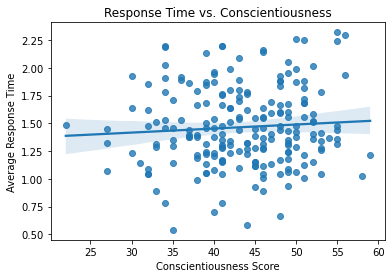

In [134]:
# Plots average response time against conscientiousness score with linear regression
p = sns.regplot(x = C_scores, y = average_response_time) 
p.set(xlabel='Conscientiousness Score', ylabel='Average Response Time', title = 'Response Time vs. Conscientiousness')

[Text(0.5, 0, 'Agreableness Score'),
 Text(0, 0.5, 'Average Response Time'),
 Text(0.5, 1.0, 'Response Time vs. Agreableness')]

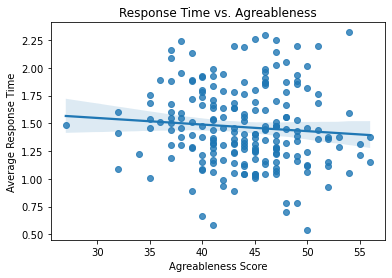

In [14]:
# Plots average response time against agreableness score with linear regression
p = sns.regplot(x = A_scores, y = average_response_time) 
p.set(xlabel='Agreableness Score', ylabel='Average Response Time', title = 'Response Time vs. Agreableness')

[Text(0.5, 0, 'Extraversion Score'),
 Text(0, 0.5, 'Average Response Time'),
 Text(0.5, 1.0, 'Response Time vs. Extraversion')]

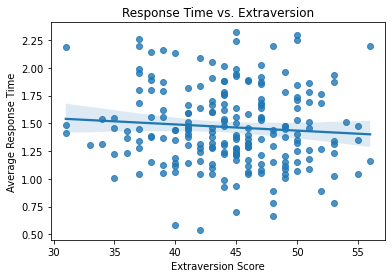

In [15]:
# Plots average response time against extraversion score with linear regression
p = sns.regplot(x = E_scores, y = average_response_time) 
p.set(xlabel='Extraversion Score', ylabel='Average Response Time', title = 'Response Time vs. Extraversion')

[Text(0.5, 0, 'Openness Score'),
 Text(0, 0.5, 'Average Response Time'),
 Text(0.5, 1.0, 'Response Time vs. Openness')]

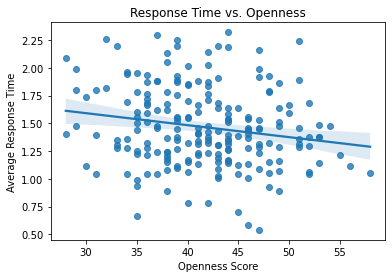

In [16]:
# Plots average response time against openness score with linear regression
p = sns.regplot(x = O_scores, y = average_response_time) 
p.set(xlabel='Openness Score', ylabel='Average Response Time', title = 'Response Time vs. Openness')

[Text(0.5, 0, 'Neuroticism Score'),
 Text(0, 0.5, 'Average Response Time'),
 Text(0.5, 1.0, 'Response Time vs. Neuroticism')]

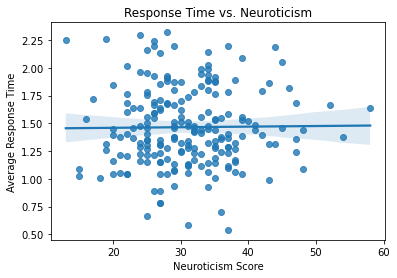

In [17]:
# Plots average response time against neuroticism score with linear regression
p = sns.regplot(x = N_scores, y = average_response_time) 
p.set(xlabel='Neuroticism Score', ylabel='Average Response Time', title = 'Response Time vs. Neuroticism')

There is not obviously a relationship between conscientiousness score and average response time. We will run a hypothesis test on the linear regression to check this intuition.

The null hypothesis: There is no linear relationship between conscientiousness score and average response time.
The alternative hypothesis: There is a linear relationship between conscientiousness score and average response time.

We are conjecturing that we will fail to reject the null hypothesis.

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

reg = LinearRegression()
reg.fit(pd.Series(C_scores).values.reshape(-1,1), average_response_time.values.reshape(-1,1))
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

X = sm.add_constant(pd.Series(C_scores).values.reshape(-1,1))
est = sm.OLS(average_response_time.values.reshape(-1,1), X)
est2 = est.fit()
print(est2.summary())

The linear model is: Y = 1.3072 + 0.0036429X
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.051
Date:                Sat, 14 May 2022   Prob (F-statistic):              0.306
Time:                        14:50:28   Log-Likelihood:                -78.593
No. Observations:                 209   AIC:                             161.2
Df Residuals:                     207   BIC:                             167.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

We can see from the summary table above that our coefficient has a p-value of 0.306 which is greater than the 0.05 significance level needed to call the coefficient significant. We can also see that the R-squared value is 0.005 which is very low. This means very little of the variability of average response times is explained by conscientiousness scores. We therefore fail to reject the null hypothesis that conscientiousness is linearly related to average response time.

Perhaps people are only conscientious to correctly match faces. We can test this hypothesis by running the same code as above on only the trials with the face emotion matching task. 

The linear model is: Y = 1.5554 + 0.0049699X
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.259
Date:                Sat, 14 May 2022   Prob (F-statistic):              0.263
Time:                        13:14:03   Log-Likelihood:                -124.67
No. Observations:                 209   AIC:                             253.3
Df Residuals:                     207   BIC:                             260.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

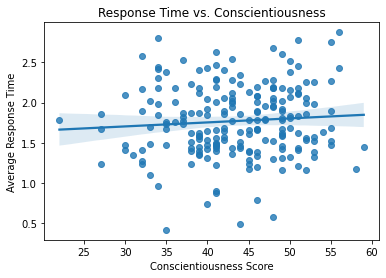

In [19]:
# Groups data of emotion match task trial by subjects 
df = df_clean[df_clean['trial_type'] == 'emotion'].groupby('subject')

# Computes mean of numeric columns and picks out the response time averages
average_response_time = df.mean()['response_time']

        
# Plots average response time against conscientiousness score with linear regression
p = sns.regplot(x = C_scores, y = average_response_time) 
p.set(xlabel='Conscientiousness Score', ylabel='Average Response Time', title = 'Response Time vs. Conscientiousness')


reg = LinearRegression()
reg.fit(pd.Series(C_scores).values.reshape(-1,1), average_response_time.values.reshape(-1,1))
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

X = sm.add_constant(pd.Series(C_scores).values.reshape(-1,1))
est = sm.OLS(average_response_time.values.reshape(-1,1), X)
est2 = est.fit()
print(est2.summary())

In [20]:
reg = LinearRegression()
reg.fit(pd.Series(C_scores).values.reshape(-1,1), average_response_time.values.reshape(-1,1))
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

X = sm.add_constant(pd.Series(C_scores).values.reshape(-1,1))
est = sm.OLS(average_response_time.values.reshape(-1,1), X)
est2 = est.fit()
print(est2.summary())

The linear model is: Y = 1.5554 + 0.0049699X
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.259
Date:                Sat, 14 May 2022   Prob (F-statistic):              0.263
Time:                        13:14:04   Log-Likelihood:                -124.67
No. Observations:                 209   AIC:                             253.3
Df Residuals:                     207   BIC:                             260.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

We again see from the graph that there is not clearly a linear relationship between conscientiousness score and average response time, even when we only consider responses to the face emotion matching task. This intuitive observation is verified by the fact that the p-value of our coefficient, 0.263, is far greater than the 0.05 level needed to reject the null hypothesis. We therefore fail to reject the null hypothesis, concluding that the there is not a linear relationship between conscientiousness score and average response time on the emotion matching task.

Although conscientiousness did not have a clear relationship with average response time, we can continue with some exploratory data analysis by plotting the other personality trait scores against average response time. 

It is fairly clear from all of these plots that there is no relationship between personality and average response time. The lack of relationship for agreeableness is surprising because agreeable tend to be associated with being more empathetic and attunded to people's emotions. 

Why is there such a glaring lack of relationship between personality and competency at emotion matching tasks? One hypothesis might be that personality only manifests itself in behaviors that require time to think. The restriction that subjects must respond within 5 seconds could be negating the effects of personality factors. It also could simply be that emotion and shape matching are abilities orthogonal to what personality factors measure.

Do conscientious people get more answers correctly? PUT THIS SECTION BEFORE THE RESPONSE TIME ONE.

[Text(0.5, 0, 'Conscientiousness Score'),
 Text(0, 0.5, 'Correct Response Rate'),
 Text(0.5, 1.0, 'Correct Response Rate vs. Conscientiousness')]

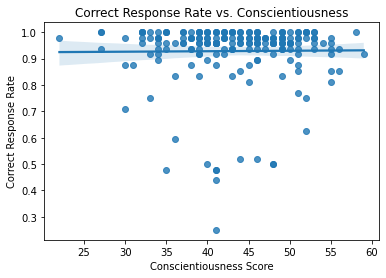

In [21]:
df_correct = df_clean[df_clean['response_accuracy'] == 'correct'].groupby('subject')
df = df_clean.groupby('subject')

corrects = df_correct.count()['response_accuracy']
accuracy_count = df.count()['response_accuracy']

num_corrects = []
for i in range(0, len(df_participants)):
    try:
        try:
            # If fails that means subject did not do emotion matching task
            # since they have no accuracy data so loop continues.
            accuracy_count[i+1]
        except:
            continue;
            
        # Tries to add the proportion of correct
        # If it fails then there was not value
        # in misses for that subject index
        # so there were no missed or incorrect trials.
        num_corrects.append(corrects[i+1]/accuracy_count[i+1])
    except:
        num_corrects.append(0)
        
# Plots proportion of missing or incorrect trials against conscientiousness score for each subject
p = sns.regplot(x = C_scores, y = num_corrects) 
p.set(xlabel='Conscientiousness Score', ylabel='Correct Response Rate', title = 'Correct Response Rate vs. Conscientiousness')


Although we can see that more conscientiousness does not correlate with a better response rate, the triangular shape of the plot is noteworthy. It almost looks as though between a conscientiousness score score of 35-55 there are more people with poorer accuracy. This can be accounted for by the fact that the average conscientiousness score for people age 19-26 (age of people in the AOMIC study) is between 42 to 48. Thus there is just more data in that range so more chance for outliers.
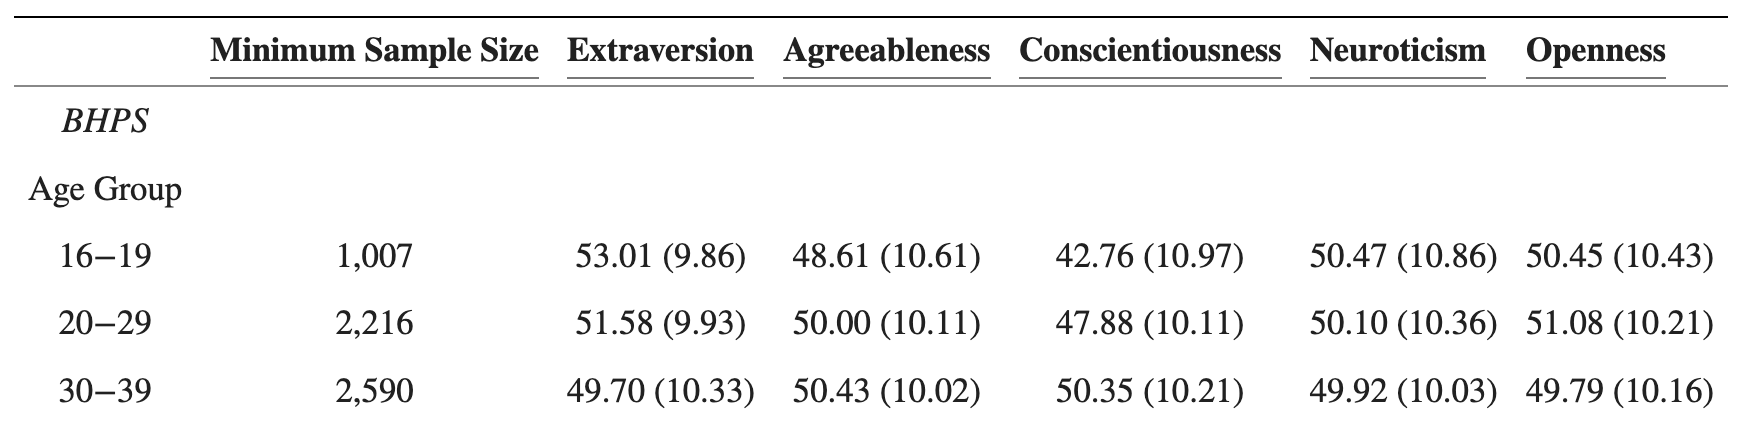
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2562318/#:~:text=For%20example%2C%20the%20average%20score,GSOEP%20(see%20Table%201). 


[Text(0.5, 0, 'Raven Score'),
 Text(0, 0.5, 'Average Response Time'),
 Text(0.5, 1.0, 'Response Time vs. Intelligence')]

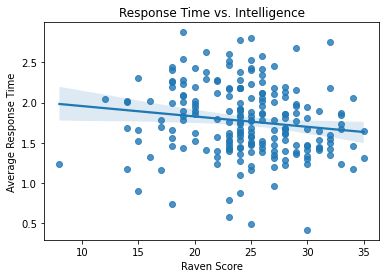

In [22]:
# Plots average response time against raven intelligence score with linear regression
p = sns.regplot(x = Raven_scores, y = average_response_time) 
p.set(xlabel='Raven Score', ylabel='Average Response Time', title = 'Response Time vs. Intelligence')

No relationship between intelligence and average response time

[Text(0.5, 0, 'Raven Score'),
 Text(0, 0.5, 'Correct Response Rate'),
 Text(0.5, 1.0, 'Correct Response Rate vs. Intelligence')]

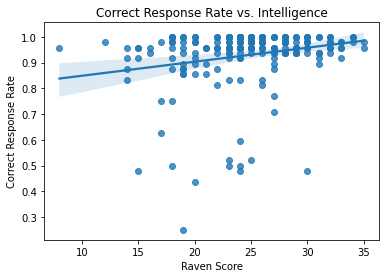

In [23]:
# Plots average response time against raven intelligence score with linear regression
p = sns.regplot(x = Raven_scores, y = num_corrects) 
p.set(xlabel='Raven Score', ylabel='Correct Response Rate', title = 'Correct Response Rate vs. Intelligence')

Same behavior as personality where no clear relationship and outliers in proprotion to where most of the data is clustered.

Demographic Analysis

Do mistakes cluster? Meaning people get flustered after making a mistake?

In [28]:
df_participants

,participant_id,age,sex,BMI,handedness,education_category,religious_now,raven_score,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C
0,sub-0001,26.25,F,24.0,right,applied,no,29.0,35,44,37,39,48
1,sub-0002,21.00,F,23.0,right,academic,no,27.0,27,53,40,48,34
2,sub-0003,23.00,M,22.0,right,academic,no,22.0,35,40,43,37,38
3,sub-0004,23.50,F,22.0,right,applied,no,21.0,29,47,41,48,41
4,sub-0005,21.75,M,19.0,ambidextrous,applied,no,28.0,26,35,40,38,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,sub-0212,20.50,F,29.0,ambidextrous,applied,no,19.0,24,44,29,47,41
212,sub-0213,19.75,M,26.0,right,applied,no,18.0,20,50,40,46,39
213,sub-0214,19.50,M,19.0,right,applied,no,19.0,24,50,37,46,56
214,sub-0215,18.25,F,20.0,right,applied,yes,24.0,33,42,42,41,48


Although it looks like there is an clear difference between the response time distributions of the emotion and control trials we will want to run a statistical test to verify that this is the case. To compare the equality of two one-dimensional distributions we apply the Kolmogorov-Smirnov test.
See https://towardsdatascience.com/how-to-compare-two-distributions-in-practice-8c676904a285 for information about this test.
When you apply a statistical test you must be very careful to note the assumptions. For example for the Kolmogorov-Smirnov test it is assumed that the two distributions you are comparing are independant. This is not the case when we aggregate the trials accross all participants because we used the same subjects for both trial types. We need to control for the variable of subject before applying to Kolmogorov-Smirnov test. What we will do is run the Kolmogorov-Smirnov test for each subject independently and keep track of how many times the p-values was below our critical threshold value of 0.05. 

Discussion of why they are independent for fixed participants and not for aggregate. For a given particpant there are many trials collected on how fast they respond to the emotion task and the control task. The response to a control task should not effect the response to an emotion task and vice-versa so the response time distributions for the control task and emotion task for a given particpant are independent. When we aggregate the data accross all participants, the distributions are not independent anymore. Because the same subjects are used in both distributions and are no longer fixed/controlled for. The subject a response time came from on the control task might influence the response time 
When we run the Kolmogorov-Smirnov test on that particp

In [25]:
from scipy.stats import ks_2samp

pvals = []
# Performs Kolmogorov-Smirnov test for each subject
for i in range(1, len(df_participants)):
    if len(df_subjects[df_subjects['subject'] == i]) != 0:
        statistic, p = ks_2samp(df_clean[(df_clean['trial_type'] == 'control') & (df_clean['response_time'] != None) & (df_clean['subject'] == i)]['response_time'], 
                            df_clean[(df_clean['trial_type'] == 'emotion') & (df_clean['response_time'] != None) & (df_clean['subject'] == i)]['response_time'])
        pvals.append(p < 0.5)

# Prints number of subjects for which there is a significant 
# difference between their control and emotion trials
print(sum(pvals))

# print total number of subjects who did the emotion matching task
print(len(pvals))

# Prints the proportion of subjects with p-values less 
# than the critical value of 0.05.
print(sum(pvals)/len(pvals))



207
209
0.9904306220095693


We see that when we control for the subject by running our hypothesis test seperately for each subject, we reject the null hypothesis that the distribution are equal for 207 out of the 209 subjects. This gives us strong supporting evidence that peoples' response time are different to the shape matching task compared to the emotion matching task.  If we ran the Kolmogorov-Smirnov test without controlling for the subjects by performing the test for fixeed subjects, we would get the unintuitive result that the distriubtions are the very similar, as seen below.

In [26]:
# Performs Kolmogorov-Smirnov test
hist1 = df_subjects[(df_subjects['trial_type'] == 'control')]['response_time']
hist2 =  df_subjects[(df_subjects['trial_type'] == 'emotion')]['response_time']
# Performs Kolmogorov-Smirnov test on the histograms
ks_2samp(hist1, hist2)

KstestResult(statistic=0.5516347687400319, pvalue=0.0)

In this case the p-value is far above our critical threshold meaning we would fail to reject the null hypothesis that the distributions are the same. But as we have discussed this would be mistaken since we did not satisfy the independence assumption of the Kolmogorov-Smirnov test when aggregating all the subjects' data together. Remember, be careful you read hypothesis test assumptions carefully!

#MORE CAREFULLY EXPLAIN THE Kolmogorov-Smirnov test

Based on our plot, that people take less time, on average, to respond to 

In [27]:
# Groups data by subjects
df = df_clean.groupby('subject')

# Computes mean of numeric columns and picks out the response time averages
average_response_time = df.mean()['response_time']

# For each subject with an average response time creates 
# a list with the corresponding conscientiousness score
A_scores = []
E_scores = []
O_scores = []
N_scores = []
Raven_scores = []
for i in range(0, len(df_participants)):
    try:
        # If average_response_time has a value at index i 
        # then it will continue in the try block
        # else it will go to the except block.
        average_response_time[i+1]
        # Adds to the list of conscientiousness scores
        A_scores.append(df_participants['NEO_A'][i])
        E_scores.append(df_participants['NEO_E'][i])
        O_scores.append(df_participants['NEO_O'][i])
        N_scores.append(df_participants['NEO_N'][i])
        Raven_scores.append(df_participants['raven_score'][i])
    except:
        continue

### Sources

1. https://www.ihhp.com/meaning-of-emotional-intelligence/
2. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5639474/
3. https://iq-tests.org/the-raven-iq-test.html
4. https://www.nature.com/articles/s41597-021-00870-6